Task 7: Support Vector Machines (SVM)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#Load Dataset
# Breast Cancer dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Shape:", X.shape)
print("Classes:", np.unique(y))


Shape: (569, 30)
Classes: [0 1]


In [3]:
# Preprocess (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Train SVM (Linear Kernel)
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("✅ Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

✅ Linear SVM Accuracy: 0.956140350877193

Confusion Matrix:
 [[41  2]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
# Train SVM (RBF Kernel)
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("✅ RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

✅ RBF SVM Accuracy: 0.9649122807017544

Confusion Matrix:
 [[41  2]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [9]:
# Cross-Validation
scores = cross_val_score(svm_rbf, X_scaled, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.95614035 0.94736842 0.95614035 0.97368421 0.96460177]
Mean CV Accuracy: 0.9595870206489675


In [10]:
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Accuracy: 0.9789318428815401


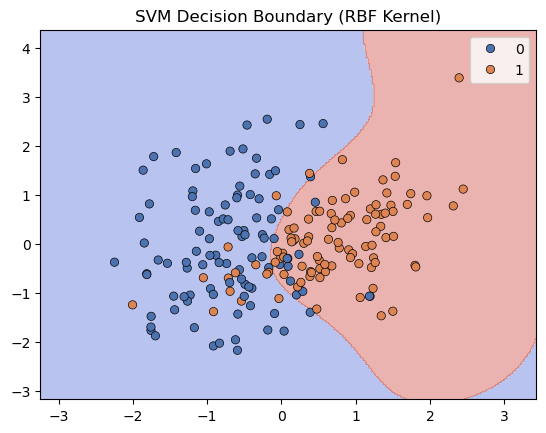

In [11]:
#Visualization (2D Data Example)

# Generate simple 2D dataset for visualization
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, n_samples=200, random_state=42)

scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(X_vis)

svm_vis = SVC(kernel='rbf', C=1, gamma=0.5)
svm_vis.fit(X_vis, y_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette="deep", edgecolor="k")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()